## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [61]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
nrows = df.shape[0]; nrows

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].duplicated().any()

True

In [5]:
df[df['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


In [6]:
df[df['user_id']==698120]

,user_id,timestamp,group,landing_page,converted
988,698120,2017-01-22 07:09:37.540970,control,new_page,0
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0


Note that the duplicated users are users that have been in the new pages and in the old page

There are duplications in the original dataframe (i.e. a user can be in more than one row)

In [7]:
len(set(df["user_id"]))

290584

There are 290584 diferent users (non duplicated)

d. The proportion of users converted.

In [8]:
sum(df.converted)/df.shape[0]

0.11965919355605512

In [9]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
m1 = df[(df["landing_page"] == "new_page") & (df["group"]!="treatment")].shape[0] #missmatch on new_page
m2 = df[(df["landing_page"] != "new_page") & (df["group"]=="treatment")].shape[0] #missmatch on treatment
n_linups = m1 + m2; n_linups

3893

f. Do any of the rows have missing values?

In [11]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  
In this case, we should delete the rows where the landing_page and group columns don't match since we should only use the rows that we can feel confident in the accuracy of the data.


a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df.query('(group=="treatment" & landing_page=="new_page") | (group=="control" & landing_page=="old_page") ').copy()

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2["user_id"].duplicated().any()

True

In [15]:
len(set(df2["user_id"]))

290584

In [16]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
dup_user = int(df2[df2["user_id"].duplicated()]["user_id"])
dup_user

773192

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [19]:
df2[df2["user_id"]==dup_user]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [21]:
df2.drop_duplicates(subset ="user_id", 
                     keep = 'first', inplace = True) 

In [22]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
df_ctl = df2[df2["group"]=="control"].copy()
df_ctl["converted"].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
df_ttm = df2[df2["group"]=="treatment"].copy()
df_ttm["converted"].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
n_new_page = df2[df2["landing_page"]=="new_page"].shape[0]
total = df2.shape[0]

prob = n_new_page/total
prob

0.5000619442226688

In [27]:
(df2['landing_page'] == 'new_page').mean ()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** The proportion of individuals in the *new page* vs the *old page* is balanced, therefore there is not required any additional manipulation to balance the impact of uneven weights between the pages.

Considering the probability of conversion in *control* versus *treatment*, there is not sufficient evidence to say that conversion probability of *treatment* group is greater than the *control* group. 

Therefore the results suggest keeping the old website or keep the experiment running.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$
\begin{cases}
H_0: \ p_\text{new} \leq p_\text{old}\ \Leftrightarrow  \ p_\text{new}-p_\text{old}\geq 0;\ \text{Null hypotheses} \\
H_1: \ p_\text{new} > p_\text{old}\ \Leftrightarrow  \ p_\text{new}-p_\text{old} < 0; \ \text{Alternative hypotheses}
\end{cases}
$$

$$\alpha = 0.05$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [30]:
n_new = df2[df2["landing_page"]=="new_page"].shape[0]
n_new

145310

d. What is $n_{old}$?

In [31]:
n_old = df2[df2["landing_page"]=="old_page"].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
np.random.seed(1)

new_page_converted=np.random.binomial(n=1,p=p_new,size=n_new)
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted=np.random.binomial(n=1,p=p_old,size=n_old)
old_page_converted

array([1, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
new_page_converted.mean() - old_page_converted.mean()

0.0013401450030546824

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
p_diffs=[]
for i in range(10000):
    new_page_converted=np.random.binomial(n=1,p=p_new,size=n_new)
    old_page_converted=np.random.binomial(n=1,p=p_old,size=n_old)
    p_dif = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_dif)

p_diffs = np.array(p_diffs)

In [36]:
p_diffs

array([ 0.00108562,  0.00089949,  0.00053492, ...,  0.00031436,
       -0.00013953,  0.00043826])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   3.,   18.,   45.,   79.,  160.,  334.,  555.,  821., 1076.,
        1319., 1343., 1285., 1089.,  789.,  505.,  302.,  144.,   76.,
          41.,   16.]),
 array([-0.00427621, -0.00386497, -0.00345374, -0.0030425 , -0.00263126,
        -0.00222003, -0.00180879, -0.00139756, -0.00098632, -0.00057508,
        -0.00016385,  0.00024739,  0.00065863,  0.00106986,  0.0014811 ,
         0.00189234,  0.00230357,  0.00271481,  0.00312604,  0.00353728,
         0.00394852]),
 <a list of 20 Patch objects>)

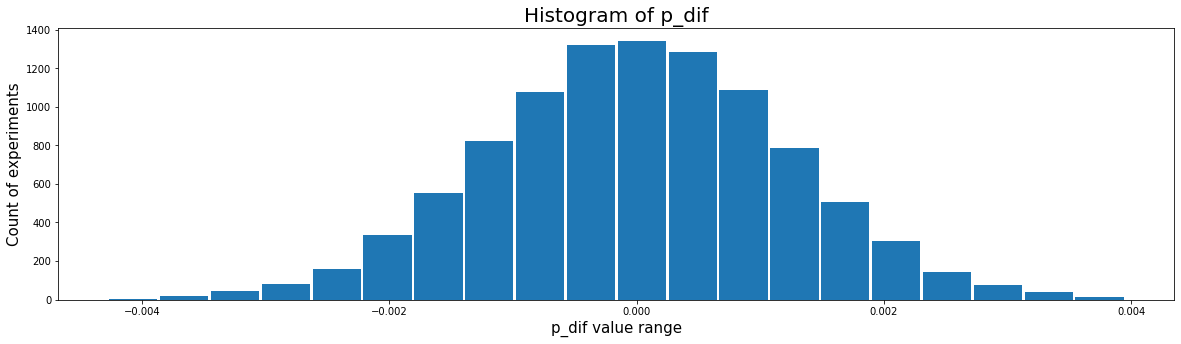

In [37]:
plt.figure(figsize=(20,5))
plt.title('Histogram of p_dif',size = 20)
plt.xlabel('p_dif value range', size = 15)
plt.ylabel('Count of experiments', size = 15)
plt.hist(p_diffs, bins = 20, rwidth  = 0.95)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
p_dif_actual = df_ttm["converted"].mean() - df_ctl["converted"].mean()
p_dif_actual

-0.0015782389853555567

In [39]:
p_val = (p_diffs>p_dif_actual).mean()
p_val #proportion of p_diffs that are greater than the actual difference observed in ab_data.csv

0.9089

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** The value that we have computed is known as *p-value*.

The *p-value* is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. 

In our example the $p-\text{value} = 0.9$, this means that the probability of our test results happening (having prob. difference of -0.0016) assuming that the null hypotheses is true is of 90%, i.e. we do not have sufficient evidence to reject the null hypotheses.

We would reject the null hypotheses if the *p-value* was smaller than our confidence value $\alpha=0.05$.


Graphically a hystogram is plotted and the results of the experiment is shown as a red vertical line. 
The results of the histogram on the right side of the vertical line are cases where the results are better (for the new website) than the actual experimented results, those represent 90% of the expermients. This means that  under the null hypotheses having better results on the new website than the ones that we have had is very likely, therefore we do not have sufficient evidence to reject the null hypotheses, i.e. there is not enough evidence to say that the new website is better than the old.
We would be able to say otherwise if the number of experiments on the right side of the red line represented 5% of the total number of simulations, which is not the case at all.


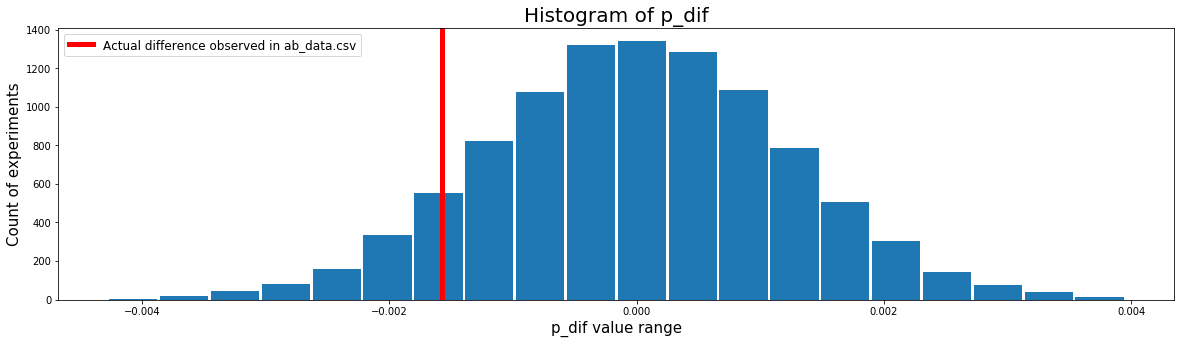

In [40]:
plt.figure(figsize=(20,5))
plt.title('Histogram of p_dif',size = 20)
plt.xlabel('p_dif value range', size = 15)
plt.ylabel('Count of experiments', size = 15)
plt.hist(p_diffs, bins = 20, rwidth  = 0.95)

plt.axvline(p_dif_actual, color='r', linewidth = 5, label = "Actual difference observed in ab_data.csv");
plt.legend(loc=2, prop={'size': 12})
# x=low, color='b', linewidth=2, label='mean of ab_data difference'

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old =  df2.query('(landing_page=="old_page" & converted==1) ').shape[0]
convert_new =  df2.query('(landing_page=="new_page" & converted==1) ').shape[0]
n_old = df2[df2["landing_page"]=="old_page"].shape[0]
n_new = df2[df2["landing_page"]=="new_page"].shape[0]

(convert_old, convert_new, n_old, n_new)

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

In [43]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The *z-score* and *p-value* are consistent with the simulated results.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since the predicted variable is binary, we should use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
#compute intercept
df2["intercept"] = 1

#compute ab_page column
df2_dummies = pd.get_dummies(df2['group'])["treatment"]  #compute the dummy variable
df2 = pd.concat([df2, df2_dummies], axis = 1)  #add the dummy value with name treatment
df2.rename(columns={'treatment':'ab_page'}, inplace=True) #rename the treatment column to ab_page

df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:               8.077e-06
Time:                        16:14:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** The p-value associated with *ab_page* is 0.190.
The p-value differs from the one calculated in **Part II** bacause in this case, the test is two-tailed. 
However the conclusions are the same, we still fail to reject the null and conclude that there is no significant contribution from the page shown to the difference in conversion rates. 


Explanation in more detail the two-tailed test:
    
Let *ab_page* be the slope (non-intercept term) of our logistic regression model.

Then the null and alternative hypothesis assotiated with the regression model are the following:

$$
\begin{cases}
H_0: \ \text{ab_page} = 0;\ \text{Null hypotheses} \\
H_1: \ \text{ab_page} \neq 0; \ \text{Alternative hypotheses}
\end{cases}
$$

$$\alpha = 0.05$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** It is a good idea to consider other factors in the regression model to make sure that we don't let anything causaly related to the experiment influence how we apply our test.

For instance, as a theoretical example:

The new page could be focused on improving the conversion rate of UK users, and maybe it does improve the conversion rate of UK users.
However if the new page does not have any difference in conversion rate with the US users, and we have significantly more US users than the UK users, we could derive that overall the new page does not have an improvement on conversion rate.

This is well known as the **Simpson's paradox**, which simply states that one can devire 2 opposite conclusions on some data depending on how you divide things. The good practice is not to let anything causaly related to the experiment influencce how we apply it. In the example we should treat UK and US users seperately.


Hence, being a good practice ading terms to the regresion model.


However one should be cautious at adding terms on a regression model for two reasons:
- **Multicloniearity**: In a regresion model the predictor variables must be uncorrleated with one another. Our X-variables should be correlated with the response variable, but not with each other. This can lead to flip regression coefficients. Lets say for instance as an example that we divide by hour of the day and country, we would probably see that the UK has more experiments in some hours than in others, and similarly the US will have peaks of experiments in some hours compared to others. To solve this multiconlinearity in the categorical features (country and hour) we should balance our experiments to have the same number of observations by country and hour, if we do not balance the experiment data its likely to be falling in multicolinearity. Safety checks for multicolinearity are using a **scattrplot Matrix or VIF**s.

- **Reducing too much the number of experiments per class**: If we split in too many categories we may have some categories without a significant amount of experiments to infere significant results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
df_countries = pd.read_csv('./countries.csv')
df_countries

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


In [53]:
df_dummies = pd.get_dummies(df_countries['country'])  #compute the dummy variable
df_dummies = pd.concat([df_countries, df_dummies], axis = 1)
df_dummies

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0
...,...,...,...,...,...
290579,653118,US,0,0,1
290580,878226,UK,0,1,0
290581,799368,UK,0,1,0
290582,655535,CA,1,0,0


In [50]:
df2 = df2.merge(df_dummies,how = 'left', left_on = "user_id", right_on = "user_id")
df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
290579,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,US,0,0,1
290580,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,US,0,0,1
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US,0,0,1
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US,0,0,1


In [80]:
df_pconv = df2[["group","converted","country"]].groupby(["group","country"]).mean()
df_pconv.rename(columns={'converted':'p_conv'}, inplace=True)
df_pconv

p_conv
group     country          
control   CA       0.118783
          UK       0.120022
          US       0.120630
treatment CA       0.111902
          UK       0.121171
          US       0.118466

In [ ]:
df_pconv = df_pconv.reset_index()

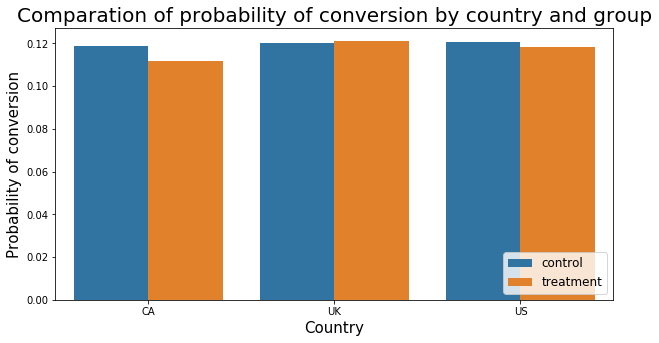

In [95]:
plt.figure(figsize=(10, 5))


sns.barplot(x="country", hue="group", y="p_conv", data=df_pconv)

plt.title('Comparation of probability of conversion by country and group',size = 20)
plt.xlabel('Country', size = 15)
plt.ylabel('Probability of conversion', size = 15)
plt.legend(loc=4, prop={'size': 12})

plt.show()




# plt.figure(figsize=(20,5))


# plt.ylabel('Count of experiments', size = 15)
# plt.hist(p_diffs, bins = 20, rwidth  = 0.95)

**Anwer:** Apparently the country variable does not seem to have an impact on the conversion rate. The plot above shows that every column has a very simmmilar value.

In [97]:
df2 = df2.drop(columns=['country', 'US'])
df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
290579,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,0,0
290580,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,0,0
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,0,0
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [101]:
log_model = sm.Logit(df2['converted'], df2[['intercept','ab_page','CA', 'UK']])
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:               2.323e-05
Time:                        16:41:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

The p-values of ab_page (0.191) is again greater than $\alpha = 0.05$ therefore we dont have enough evidence to day that the new website has a different conversion rate than the old website.

Similarly, the p-value of CA and UK (0.13, and 0.457) are also greater than alpha which means that we do not have enough evidence to say that CA or UK users convert differently than US users.


<a id='conclusions'></a>
## Conclusions

Accoding to the analysis there is not enough evidence to suggest that the new website is better than the old website considering the conversion rates.

Furthermore, we do not have enough evidence to suggest that the conversion rate between different countries is different.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.